# Affine transformation

An **affine transformation** is a linear transformation, which means that every point on the function $ f(x, y) $ is transformed by the same amount regardless of where it is in space. Rotating, scaling, and shrinking are all examples of affine transformations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib inline

In [2]:
def plot_function(X, Y, fn, linewidth=0, title=''):
    X, Y = np.meshgrid(X, Y)
    Z = fn(X, Y)
    
    # Create figure.
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

    # Customize the z axis.
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.title(title)

    plt.show()
    

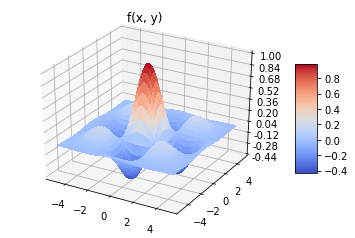

In [3]:
X = np.arange(-5, 5, 0.025)
Y = np.arange(-5, 5, 0.025)
f = lambda x, y : np.exp(-(x**2 + y**2) / 10) * np.cos(x) * np.cos(y)

plot_function(X, Y, f, title='f(x, y)')

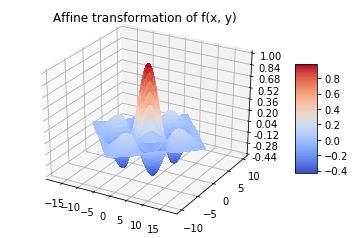

In [4]:
J = np.array([[2, -1.5], [1, 1]])
affine = lambda X, Y, J : np.matmul(J, np.stack((X, Y), axis=1))

Xm, Ym = np.meshgrid(X, Y)
X_j = affine(Xm, Ym, J)

# Create figure.
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X_j[:, 0, :], X_j[:, 1, :], f(Xm, Ym), cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Affine transformation of f(x, y)')

plt.show()


# The Jacobian

Unlike an affine transformation, a nonlinear transformation may transform a function in ways that differ depending on where you are in space. However, a nonlinear transformation appears linear if you look only at the local transformations around a point. The **Jacobian** estimates the local linear transformation of a function at any point. 

The Jacobian is defined:

$$
J f(x, y) = \left[ \begin{array}{c} \frac{dP}{dx} \frac{dP}{dy} \\
                                    \frac{dQ}{dx} \frac{dQ}{dy} \end{array} \right]
$$

The determinant of the Jacobian indicates by how much the local space is being "stretched" or "compressed" at a point. 

$$
\begin{array}{cc} Det(J) > 1 & \text{stretched} \\
                  0 < Det(J) < 1 & \text{compressed} \\
                  -1 < Det(J) < 0 & \text{compressed and x and y cross} \\
                  Det(J) < -1 & \text{stretched and x and y cross} \end{array}
$$

For the following function $ F(x, y) $:

$$
F(x, y) = \left[ \begin{array}{c} P(x, y) \\
                                  Q(x, y) \end{array} \right]
        = \left[ \begin{array}{c} x + sin(y) \\
                                  y + sin(x) \end{array} \right]
$$

The corresponding Jacobian is:

$$
J F(x, y) = \left[ \begin{array}{cc} 
                   1 + sin(y) & x + cos(y) \\
                   1 + sin(y) & y + cos(x) \end{array} \right]
$$

In [5]:
X = np.arange(-5, 5, 0.025)
Y = np.arange(-5, 5, 0.025)

Xm, Ym = np.meshgrid(X, Y)
f = lambda Xm, Ym : (Xm + np.sin(Ym), Ym + np.sin(Xm))
Xms, Yms = f(Xm, Ym)

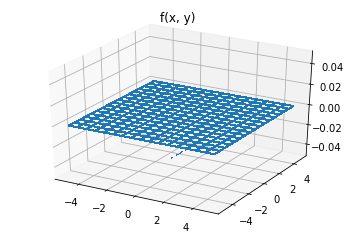

In [6]:
# Create figure.
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_wireframe(Xm, Ym, np.zeros(Xm.shape[0]), 
                         cmap=cm.coolwarm, linewidth=1, antialiased=False,
                         rstride=25, cstride=25)
plt.title('f(x, y)')
plt.show()

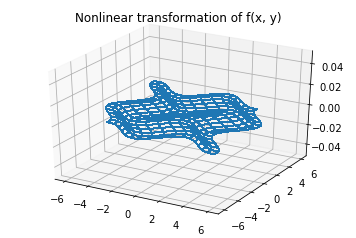

In [7]:
# Create figure.
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_wireframe(Xms, Yms, np.zeros(Xm.shape[0]), 
                         cmap=cm.coolwarm, linewidth=1, antialiased=False,
                         rstride=25, cstride=25)
plt.title('Nonlinear transformation of f(x, y)')
plt.show()

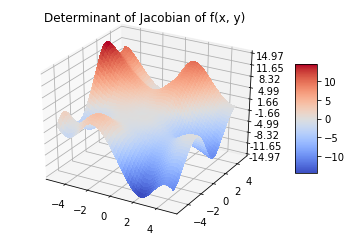

In [8]:
detJ = lambda X, Y : (1 + np.sin(X)) * (Y + np.cos(X)) - (1 + np.sin(Y)) * (X + np.cos(Y))
detJ = np.vectorize(detJ)

# Create figure.
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(Xm, Ym, detJ(Xm, Ym), cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Determinant of Jacobian of f(x, y)')

plt.show()
